In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
def CalcularGrafiente():
    x = sympy.Symbol("x")
    funcion = x ** 3 + 4 * x ** 2 + 6 * x - 12
    grad_1 = sympy.diff(funcion)
    grad_2 = sympy.diff(grad_1)
    return [grad_1, grad_2]


primera, segunda = CalcularGrafiente()
print(primera)
print(segunda)

3*x**2 + 8*x + 6
6*x + 8


* https://www.youtube.com/watch?v=m3vd3vi6a_s
* Gradiente Descendente

------------------------
iteración  1
x =  1.0 , y =  17.0
------------------------
iteración  2
x =  0.29999999999999993 , y =  8.67
------------------------
iteración  3
x =  -0.19000000000000006 , y =  4.588299999999999
------------------------
iteración  4
x =  -0.533 , y =  2.588267
------------------------
iteración  5
x =  -0.7731 , y =  1.6082508300000002
------------------------
iteración  6
x =  -0.9411700000000001 , y =  1.1280429067000002
------------------------
iteración  7
x =  -1.058819 , y =  0.8927410242830005
------------------------
iteración  8
x =  -1.1411733 , y =  0.7774431018986698
------------------------
iteración  9
x =  -1.19882131 , y =  0.7209471199303481
------------------------
iteración  10
x =  -1.239174917 , y =  0.6932640887658703
------------------------
iteración  11
x =  -1.2674224419 , y =  0.6796994034952766
------------------------
iteración  12
x =  -1.28719570933 , y =  0.6730527077126851
------------------------
iteración  13
x =  -1.301036

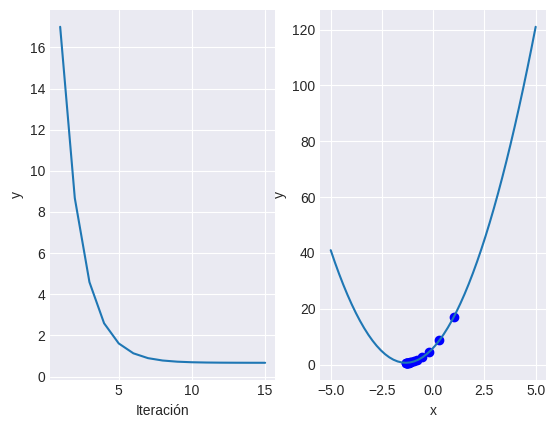

In [4]:
# Ejemplo del gradiente descendente aplicado a la función y = x^2 + 1
# La ecuación matemática para el gradiente (derivada) es = 2*x

x_inicial = np.random.randint(2,6)
alpha = 0.05
n_iteraciones = 15

iteraciones = []
y = []

x = x_inicial
for i in range(n_iteraciones):
    print("------------------------")
    print("iteración ", str(i + 1))
    # Calcular gradiente
    gradiente = 6 * x + 8
    # Actualizar "x" usando gradiente descendente
    x = x - alpha * gradiente
    # Almacenar iteración y valor correspondiente
    y.append(3 * x**2 + 8 * x + 6)
    iteraciones.append(i + 1)
    # Imprimir iteraciones
    print("x = ", str(x), ", y = ", str(3 * x**2 + 8 * x + 6))
    plt.subplot(1, 2, 2)
    plt.plot(x, y[-1], "bo")


plt.subplot(1, 2, 1)
plt.plot(iteraciones, y)
plt.grid(True)
plt.xlabel("Iteración")
plt.ylabel("y")
X = np.linspace(-5, 5, 50)
Y = 3 * X**2 + 8 * X + 6
plt.subplot(1, 2, 2)
plt.plot(X, Y)#, x, y[-1], "ro")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Gradiente Descendente 2 dimensiones
$\theta = \theta_0 - \eta*\bigtriangledown f(x,y)$

In [5]:
x, y = sympy.symbols("x,y")

funcion = 4 * x**2 - 2 * y**2 + 6
expresionf = "4*x**2 - 2 * y**2 + 6 "
f = sympy.lambdify((x, y), expresionf, "numpy")

difx = sympy.diff(funcion, x)
dify = sympy.diff(funcion, y)

rate = 0.05
Xini = -3.5
Yini = 0.03
Zini = f(Xini, Yini)

VecX = [Xini]
VecY = [Yini]
VecZ = [Zini]

N_iter = 10
for i in range(N_iter):
    dfX = sympy.lambdify((x, y), difx, "numpy")
    Xi = Xini - rate * dfX(Xini, Yini)
    dfY = sympy.lambdify((x, y), dify, "numpy")
    Yi = Yini - rate * dfY(Xini, Yini)
    VecX = np.append(VecX, Xi)
    VecY = np.append(VecY, Yi)
    VecZ = np.append(VecZ, f(Xi, Yi))
    Xini = Xi
    Yini = Yi
    Zini = f(Xi, Yi)

VecZg = np.array([VecZ])

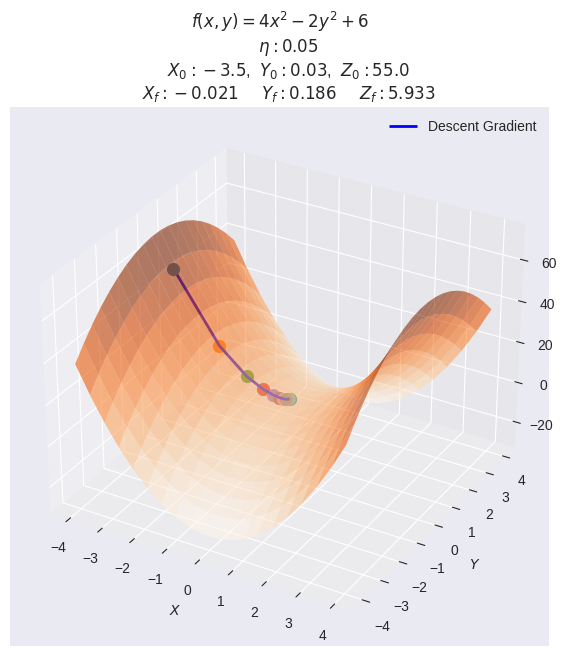

In [6]:
nx, ny = (20, 20)
X = np.linspace(-4, 4, nx)
Y = np.linspace(-4, 4, ny)
Xv, Yv = np.meshgrid(X, Y)
Z = f(Xv, Yv)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
ax.set_title(
    rf"""$ f(x,y)=4x^2 - 2y^2 + 6 $
    $\eta : {rate}$
    $X_0:{VecX[0]}$,  $Y_0:{VecY[0]}$,  $Z_0:{round(VecZ[0],1)}$
    $X_f: {round(Xini,3)}$     $Y_f: {round(Yini,3)}$     $Z_f: {round(Zini,3)}$"""
)
ax.plot_wireframe(
    VecX,
    VecY,
    VecZg,
    color="blue",
    linewidth=2,
    label=rf"Descent Gradient",
)
ax.plot_surface(Xv, Yv, Z, cmap="Oranges", alpha=0.6)
ax.legend()
for i in range(len(VecZ)):
    ax.scatter(VecX[i], VecY[i], VecZ[i], "yellow", linewidths=5)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$f(x)$")
plt.show()